### Import and Load Data


In [2]:
# First we install the emnist package using pip
!pip install emnist

# Second we import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from emnist import extract_training_samples, extract_test_samples

%matplotlib inline




#### Loading the data 

In [3]:
# we load the letters subset of the EMNIST dataset 
train_images, train_labels = extract_training_samples('letters')
test_images, test_labels = extract_test_samples('letters')

# we reshape the images from 28x28 pixels to a flat array of 784 pixels
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
test_images = test_images.reshape((test_images.shape[0], 28 * 28))

# we normalize the pixel values from [0, 255] to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255



#the trainingset consists of 124800 letters which each are represented by 784 pixels
print(train_images.shape)
print(train_labels.shape)
#the testingset consists of 20800 letters which each are represented by 784 pixels
print(test_images.shape)
print(test_labels.shape)


(124800, 784)
(124800,)
(20800, 784)
(20800,)


### Data Analysis

#### Showing the first 8 Training Letters and their corresponding Labels


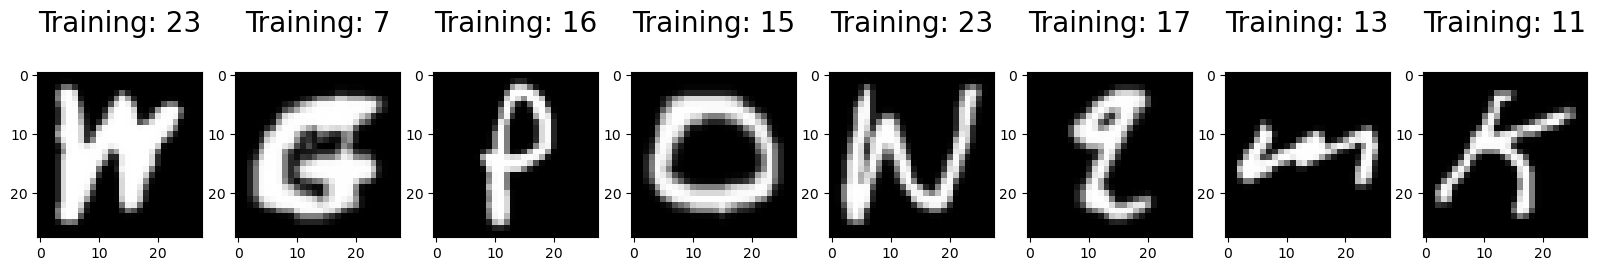

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_images[0:8], train_labels[0:8])):
    plt.subplot(1, 8, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [5]:
#This is how the letter W is represented by the DATA
print(train_images[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01176471 0.01568628 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.07843138
 0.42745098 0.44705883 0.1764706  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.44705883 0.9607843  0.99215686
 0.8392157  0.01960784 0.         0.         0.         0.
 0.         0.07843138 0.39215687 0.1294

In [6]:
# each letter is represented 4800 times in the training set 
unique, counts = np.unique(train_labels, return_counts=True)
dict(zip(unique, counts))

{1: 4800,
 2: 4800,
 3: 4800,
 4: 4800,
 5: 4800,
 6: 4800,
 7: 4800,
 8: 4800,
 9: 4800,
 10: 4800,
 11: 4800,
 12: 4800,
 13: 4800,
 14: 4800,
 15: 4800,
 16: 4800,
 17: 4800,
 18: 4800,
 19: 4800,
 20: 4800,
 21: 4800,
 22: 4800,
 23: 4800,
 24: 4800,
 25: 4800,
 26: 4800}

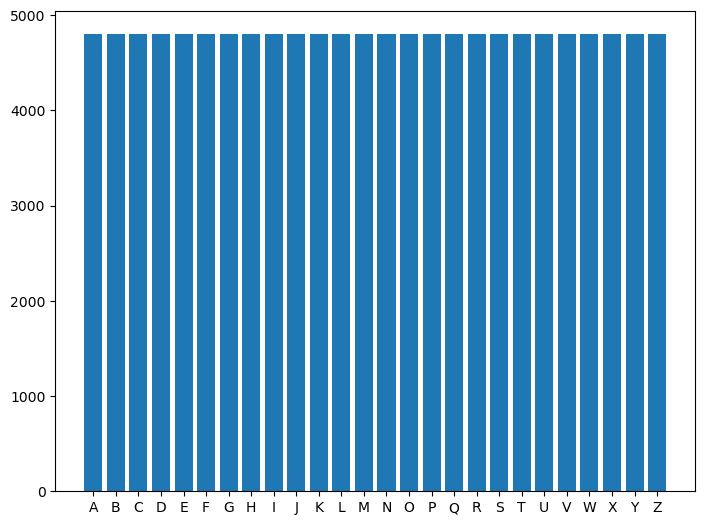

In [7]:
# Illustrated as a figure it looks like this:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
           'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Ensure 'counts' has 26 elements, one for each letter

ax.bar(letters, counts)
plt.show()


### Logistic Regression

In [8]:
# We import the LogisticRegression Model class from scikit-learn
from sklearn.linear_model import LogisticRegression

In [9]:
# Make an instance of the Model 
# we change the solver because the default one is very slow
logisticRegr = LogisticRegression(C=50.0, penalty="l1", solver="saga", tol=0.1)

In [10]:
# we train the model on our training data
logisticRegr.fit(train_images, train_labels)

LogisticRegression(C=50.0, penalty='l1', solver='saga', tol=0.1)

In [11]:
# We use the model to make predictions on our testing data 
predictions_log = logisticRegr.predict(test_images)

In [12]:
# Measuring Performance/ Accuracy
accuracy_percentage_logisticRegr = logisticRegr.score(test_images, test_labels)* 100
print(f"Accuracy: {accuracy_percentage_logisticRegr:.2f}%")


Accuracy: 72.30%


### Random Forest 

In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(train_images, train_labels)

RandomForestClassifier(n_estimators=40)

In [15]:
predictions_rf = rf.predict(test_images)

In [16]:
accuracy_percentage_rf= rf.score(test_images, test_labels)*100
print(f"Accuracy: {accuracy_percentage_rf:.2f}%")

Accuracy: 87.88%


### Evaluation of the two Models


In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
# Cross-Validation Score for Logistic Regression
log_score = cross_val_score(LogisticRegression(C=50.0, penalty="l1", solver="saga", tol=0.1), train_images, train_labels)

In [19]:
# Cross-Validation Score for RandomForest 
rf_score = cross_val_score(RandomForestClassifier(n_estimators=40), train_images, train_labels)

In [20]:
# Which model had the best average score? 
print('Logistic Regression Score: ', log_score.mean())
print('Random Forest Score: ', rf_score.mean())

Logistic Regression Score:  0.7198317307692308
Random Forest Score:  0.8727323717948717


#### Evaluation

Using a 5-Fold Cross Validation, the Random Forest Classifier achieves a higher accuracy than a Logistic Regression. Therefore, the Random Forest model is best suited to predict the letters in our data. So for the rest of the code the Random Forrest Model will be used.

## Measuring the Model Performance 
### Confusion Matrix

In [21]:
#we define a Function to plot a confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap='Pastel1'):
    # we define the alphabet corresponding to the classes
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"  
    # create a figure 
    plt.figure(figsize=(12, 12))
    # we plot the confusion matrix as a heatmap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #we add the title
    plt.title(title, size=15)
    #we add the colobar
    plt.colorbar()
    #we define tick marks for the alphabet along the axes
    tick_marks = np.arange(len(alphabet))
    #set tick labels along y and x (with rotation for readability) axis
    plt.xticks(tick_marks, list(alphabet), rotation=45, size=10)
    plt.yticks(tick_marks, list(alphabet), size=10)
    
    plt.tight_layout()
    plt.ylabel('Actual label', size=15)
    plt.xlabel('Predicted label', size=15)
    
    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                         horizontalalignment='center',
                         verticalalignment='center')


<Figure size 640x480 with 0 Axes>

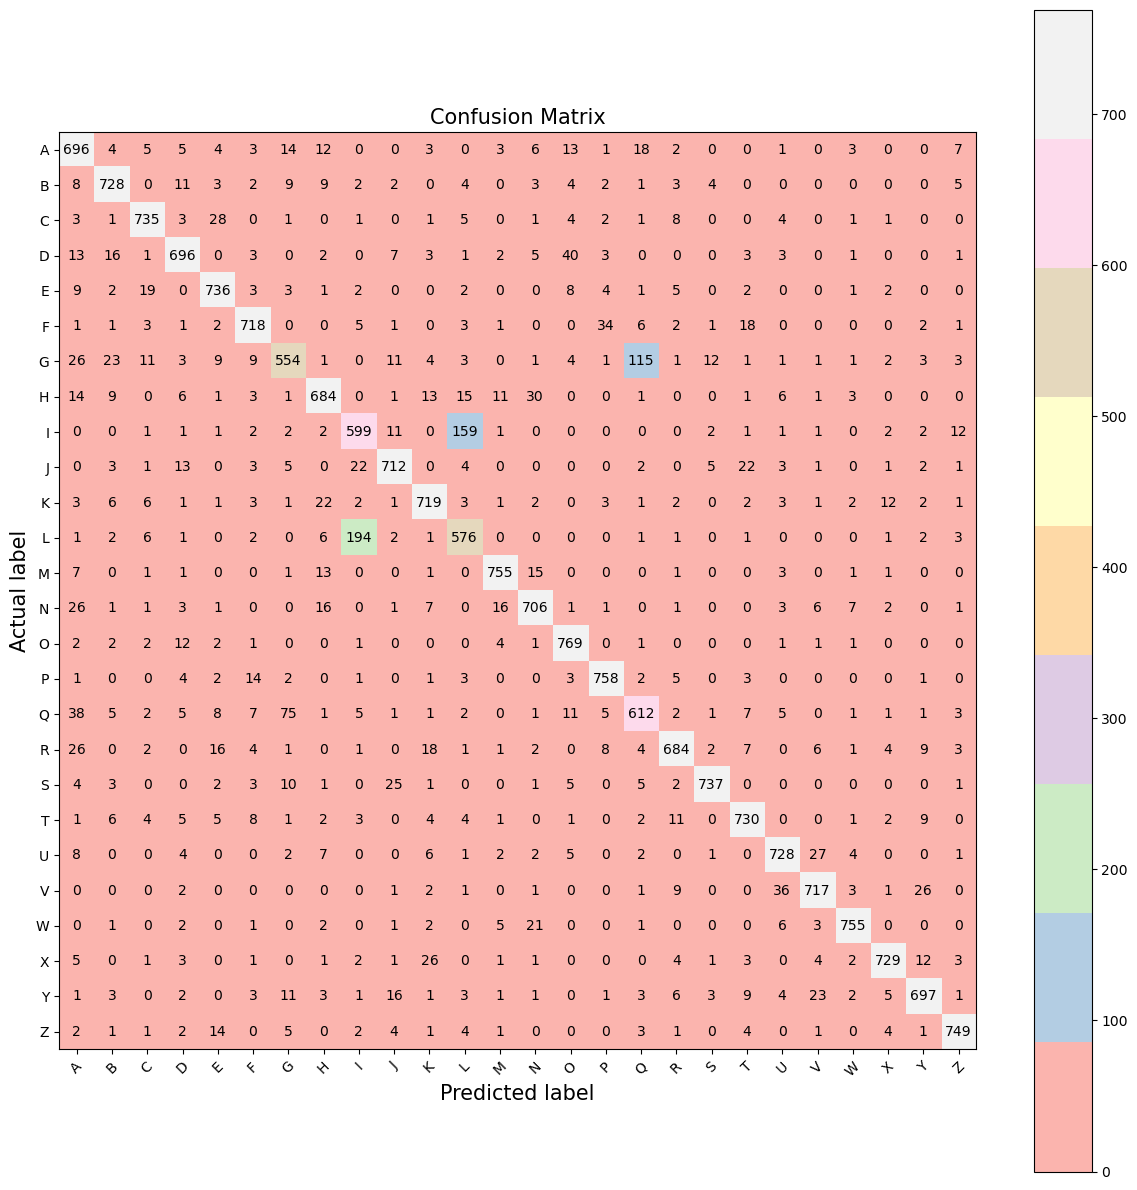

In [22]:
# confusion matrix for predictions by random forest
confusion = metrics.confusion_matrix(test_labels, predictions_rf)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();

### Misclassified and correctly classified images with Predicted and Actual Labels

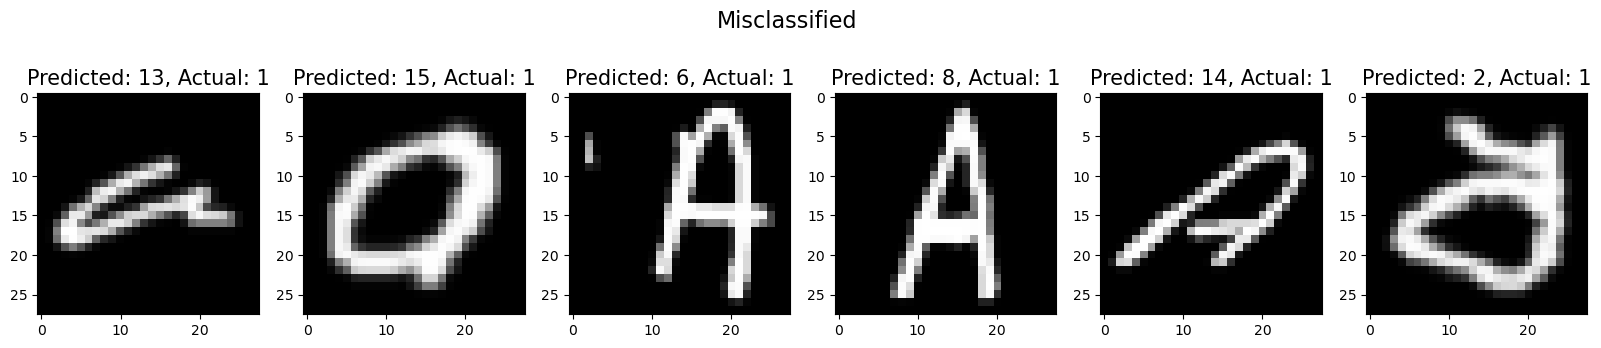

In [29]:
index = 0
misclassifiedIndex = [i for i, (label, predict) in enumerate(zip(test_labels, predictions_rf)) if label != predict]

plt.figure(figsize = (20,4))
plt.suptitle('Misclassified', fontsize=16)
for plotIndex, badIndex in enumerate(misclassifiedIndex[10:16]):
    plt.subplot(1,6, plotIndex + 1)
    plt.imshow(np.reshape(test_images[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'. format(predictions_rf[badIndex], test_labels[badIndex]), fontsize = 15)

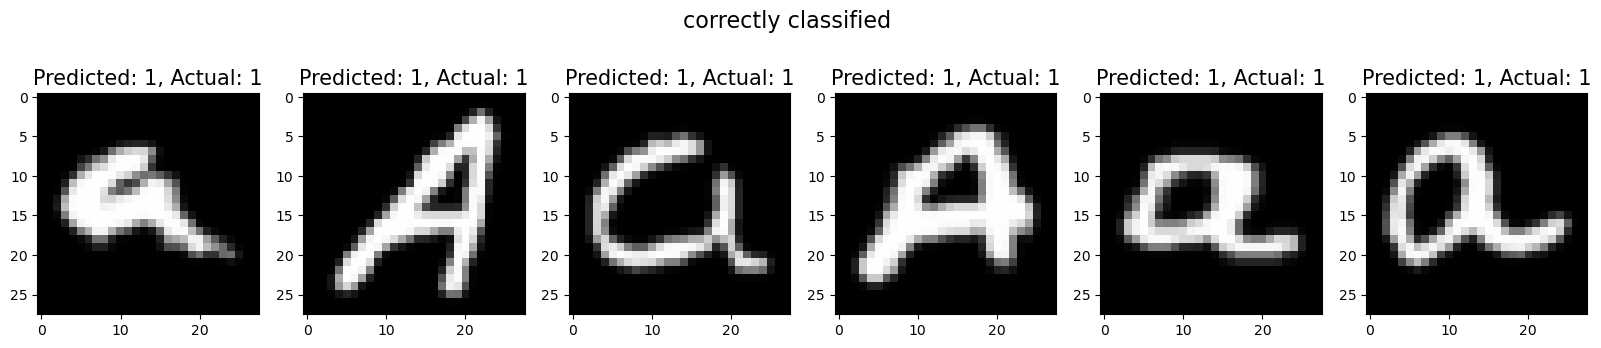

In [26]:

correctlyClassifiedIndex = [i for i in range(len(test_labels)) if predictions_rf[i] == test_labels[i]]

plt.figure(figsize=(20, 4))
plt.suptitle('correctly classified', fontsize=16)
for plotIndex, goodIndex in enumerate(correctlyClassifiedIndex[:6]):
    plt.subplot(1, 6, plotIndex + 1)
    plt.imshow(np.reshape(test_images[goodIndex], (28, 28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions_rf[goodIndex], test_labels[goodIndex]), fontsize=15)
